<span style="font-size: 20pt;"><span style="font-weight: bold;">Chapter 12.</span>Introducing time-series data: Showing periods and trends</span>

Last update: 12 January 2024

Thank you for checking out the code for: 

> Hogan, Bernie (2023) _From Social Science to Data Science_. Sage Publications. 

This notebook contains the code from the book, along with the headers and additional author notes that are not in the book as a way to help navigate the code. You can run this notebook in a browser by clicking the buttons below. 
    
The version that is uploaded to GitHub should have all the results pasted, but the best way to follow along is to clear all outputs and then start afresh. To do this in Jupyter go the menu and select "Kernel -> Restart Kernel and Clear all Outputs...". To do this on Google Colab go to the menu and select "Edit -> Clear all outputs".
    
The most up-to-date version of this code can be found at https://www.github.com/berniehogan/fsstds 

Additional resources and teaching materials can be found on Sage's forthcoming website for this book. 

All code for the book and derivative code on the book's repository is released open source under the  MIT license. 
    

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/berniehogan/fsstds/main?filepath=chapters%2FCh.12.TimeSeries.ipynb)[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/berniehogan/fsstds/blob/main/chapters/Ch.12.TimeSeries.ipynb)

<span style="font-size: 20pt;">📺 YouTube Video lecture for this chapter 📺</span>

Please note. This video and the video for Chapter 10 are still pending. 

In [44]:
from IPython.display import YouTubeVideo

# YouTubeVideo('')

# Introduction: It's about time 

In this chapter I cover time series analysis as a data wrangling and visualisation task. I do not cover mathematical models with autoregression or periodicity though that would be the next step after getting the data into shape. 

In this brisk chapter, I cover the basics of time parsing and printing (with consideration for localisation and timezones). We then reload the Stack Exchange data and use it to represent some time series data. I show how to slice the data, aggregate into weekly, monthly, and year bins, and how to present data over time and with smoothing. 

# Dates and the datetime module 

In [1]:
from datetime import datetime
import calendar

In [2]:
now = datetime.now()

print(now)
print(now.timetuple())
print(calendar.timegm(now.timetuple()))

2024-01-12 16:21:19.531654
time.struct_time(tm_year=2024, tm_mon=1, tm_mday=12, tm_hour=16, tm_min=21, tm_sec=19, tm_wday=4, tm_yday=12, tm_isdst=-1)
1705076479


## Parsing Time

In [3]:
# Taken from https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html

tweet = {
 "created_at":"Thu Apr 06 15:24:15 +0000 2017",
 "id": 850006245121695744,
 "id_str": "850006245121695744",
 "text": "1/ Today we’re sharing our vision for the future of the Twitter API platform!nhttps://t.co/XweGngmxlP",
 "user": {},
 "entities": {}
}

print(type(tweet['created_at']),tweet['created_at'])

<class 'str'> Thu Apr 06 15:24:15 +0000 2017


In [4]:
import pandas as pd

In [5]:
pd.to_datetime(tweet["created_at"])

Timestamp('2017-04-06 15:24:15+0000', tz='UTC')

In [6]:
tweet_date = "Thu Apr 06 15:24:15 +0000 2017"
print(f"The original date was formatted as: {tweet_date}")

tweet_stamp = datetime.strptime(tweet_date, "%a %b %d %H:%M:%S %z %Y")
print("We can format it differenly, such as:", 
      datetime.strftime(tweet_stamp, '%Y--%d--%b--%a %H and %M and %S %z'))

The original date was formatted as: Thu Apr 06 15:24:15 +0000 2017
We can format it differenly, such as: 2017--06--Apr--Thu 15 and 24 and 15 +0000


In [7]:
print(tweet_stamp.year,tweet_stamp.month,tweet_stamp.day,sep="--")

2017--4--6


## Timezones 

In [8]:
from datetime import timezone 

In [9]:
try:
    print(datetime.now() - tweet_stamp)
except:
    print("Cannot subtract time zone aware from non aware data")
    print(datetime.now(timezone.utc) - tweet_stamp)

Cannot subtract time zone aware from non aware data
2472 days, 0:57:10.924152


## Localisation and time 

In [10]:
import locale 
from calendar import day_abbr 

In [11]:
locale.setlocale(locale.LC_ALL, 'fr_FR.UTF-8') # French
print([day_abbr[i] for i in range(7)])

locale.setlocale(locale.LC_ALL, '') # Local (English)
print([day_abbr[i] for i in range(7)])

['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


# Revisiting the Movie Stack Exchange data

In [12]:
from pathlib import Path

In [13]:
data_dir = Path().cwd().parent / "data"

stack_df = pd.read_feather(data_dir / "movies_stack_df.feather")

# import pickle
#
# Try the Stack Downloader or the revised Chapter 10 notebook. 
#
# data_dir = Path().cwd().parent / "data"
# pickle_file = data_dir / "movies_stack_df.pkl"

# if pickle_file.exists():
#     stack_df = pickle.load(open(pickle_file ,'rb'))
#     print(len(stack_df))
# else:
#     print("Please download and clean the Stack_df data as done in ",
#           "Chapter 10. See https://archive.org/download/stackexchange")

In [14]:
print(stack_df["CreationDate"][0], type(stack_df["CreationDate"][0]))

2011-11-30 19:15:54.070000 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%config InlineBackend.figure_format = 'svg'

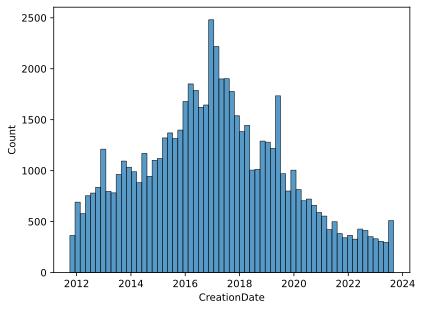

In [16]:
sns.histplot(stack_df["CreationDate"])

plt.show()

# Pandas Datetime feature extraction

In [17]:
result = stack_df["CreationDate"].dt.year
display(result.sample(5,random_state=12345))

7791     2013
5443     2013
31224    2016
38188    2017
55442    2020
Name: CreationDate, dtype: int32

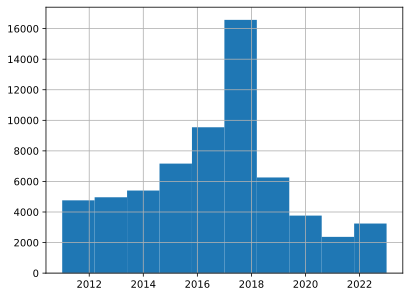

In [18]:
stack_df["CreationDate"].dt.year.hist();

plt.show()

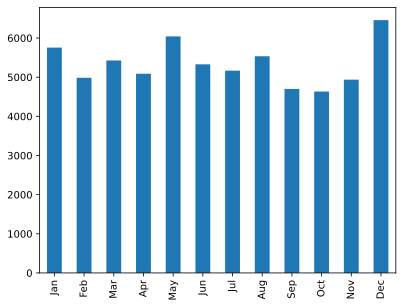

In [19]:
month_vals = stack_df["CreationDate"].dt.month.value_counts().sort_index()
month_vals.index = [calendar.month_abbr[x] for x in month_vals.index]

month_vals.plot(kind="bar");

plt.show()

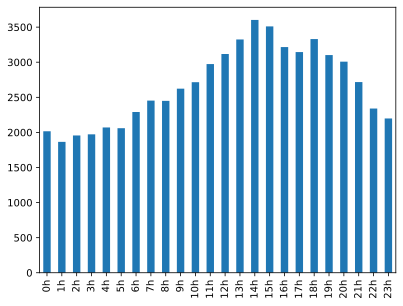

In [20]:
hour_vals = stack_df["CreationDate"].dt.hour.value_counts().sort_index()
hour_vals.index = [ f"{x}h" for x in hour_vals.index]
hour_vals.plot(kind="bar")

plt.show()

In [21]:
stack_df["CreationDate"].dt.strftime("%d %b").sample(5,random_state=12345)

7791     26 Aug
5443     16 Feb
31224    15 Dec
38188    30 Jul
55442    04 Mar
Name: CreationDate, dtype: object

# Resampling as a way to group by time period

In [ ]:
# New code tweak from book. 
# The current version of pandas enforces types more strictly. Saying *.sum() used to 
# automatically exclude columns that wouldn't sum. It doesn't anymore. So below we can 
# see first, how to use count, which works for all columns, and second, that you can 
# use sum if you filter to numeric columns. 

In [25]:
stack_df.resample('M', on="CreationDate").count().head(5)

,Id,PostTypeId,AcceptedAnswerId,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,LastActivityDate,...,ContentLicense,ParentId,FavoriteCount,LastEditorDisplayName,OwnerDisplayName,ClosedDate,CommunityOwnedDate,BodyText,BodyURLs,TagsList
CreationDate,,,,,,,,,,,,,,,,,,,,,
2011-10-31,2,2,1,2,1,2,2,1,1,2,...,2,1,1,0,2,0,0,2,2,2
2011-11-30,34,34,17,34,21,34,34,27,27,34,...,34,12,1,3,34,0,0,34,34,34
2011-12-31,534,534,135,534,172,534,523,381,405,534,...,534,248,26,39,534,13,1,534,534,534
2012-01-31,322,322,100,322,120,322,313,193,210,322,...,322,186,25,29,322,13,0,322,322,322
2012-02-29,243,243,78,243,97,243,241,147,160,243,...,243,144,16,20,243,17,0,243,243,243


In [26]:
stack_df[["CreationDate","Score"]].resample('M', on="CreationDate").sum().head(5)

,Score
CreationDate,
2011-10-31,53
2011-11-30,830
2011-12-31,9658
2012-01-31,5231
2012-02-29,3362


In [27]:
display(stack_df[["CreationDate","Score"]]
        .resample('Y',on="CreationDate")
        .max().head())

,Score
CreationDate,
2011-12-31,201
2012-12-31,225
2013-12-31,185
2014-12-31,119
2015-12-31,125


In [30]:
stack_df.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'CreationDate', 'Score',
       'ViewCount', 'Body', 'OwnerUserId', 'LastEditorUserId', 'LastEditDate',
       'LastActivityDate', 'Title', 'Tags', 'AnswerCount', 'CommentCount',
       'ContentLicense', 'ParentId', 'FavoriteCount', 'LastEditorDisplayName',
       'OwnerDisplayName', 'ClosedDate', 'CommunityOwnedDate', 'BodyText',
       'BodyURLs', 'TagsList'],
      dtype='object')

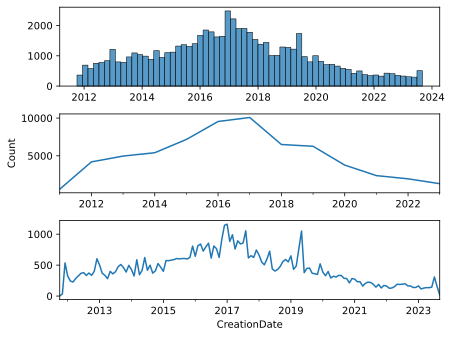

In [31]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1)

sns.histplot(stack_df["CreationDate"],
             ax=ax1).set_xlabel(None)#.set_ylabel(None)
ax1.set_ylabel(None) 

# Notice below - since we can't use sum() anymore we can use count, which 
#                in hindsight is a better approach.

stack_df[["CreationDate", "Id"]].resample('Y', 
    on="CreationDate").count().plot(ax=ax2,legend=False).set_xlabel(None)
ax2.set_ylabel("Count") 

stack_df[["CreationDate", "Id"]].resample('M',
    on="CreationDate").count().plot(ax=ax3,legend=False)

plt.tight_layout()

plt.show()

# Slicing and the Datetimeindex in Pandas

In [32]:
time_mask = (stack_df["CreationDate"]>= '2015-03-14') & \
            (stack_df["CreationDate"]<  '2015-03-15')

stack_df.iloc[:,:5][time_mask].head()

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score
16338,32102,2,None,2015-03-14 00:21:42.027,3
16339,32105,2,None,2015-03-14 00:47:27.420,0
16340,32112,2,None,2015-03-14 04:58:13.863,2
16341,32113,1,32115,2015-03-14 05:12:25.473,7
16342,32115,2,None,2015-03-14 06:19:47.067,8


In [33]:
# Counting posts within a two-year range
mask2 = (stack_df["CreationDate"] >= '2015') & \
        (stack_df["CreationDate"] <  '2017')

print(len(stack_df[mask2]))

16711


In [35]:
# Please note use of BodyText column from updated Ch. 10 and/or Downloader

time_df = stack_df.copy()
time_df['Id'] = stack_df.index
time_df.set_index('CreationDate',inplace=True)
time_df[["Id","BodyText","Score"]].sample(5, random_state=1984)

,Id,BodyText,Score
CreationDate,,,
2013-01-31 17:58:09.823,5258,"In the initial story, the suspense novel, it w...",28
2020-10-18 15:29:50.997,57834,I always wondered what Barry Allen's top speed...,-2
2012-06-21 18:38:52.847,2241,"In the episode titled ""27 and Still Cooking"" (...",4
2014-05-02 08:26:45.963,11428,"So my memory is pretty bad, but.. i believe it...",6
2013-02-10 17:26:31.060,5381,"If Tangled (2010) used live-action, what would...",6


In [36]:
print(len(time_df.loc["2015-06"]),
      len(time_df.loc["2015-07"]),
      len(time_df.loc["2018"]),
      len(time_df.sort_index().loc["2018-03-14":"2018-03-15"]),sep="\n")

607
600
6496
30


# Moving window in data 

In [37]:
time_df["Score7d"] = time_df["Score"].rolling(7, center=True).mean()
time_df[["Score","Score7d"]].head(8).style.format({"Score7d":"{:.2f}"})

,Score,Score7d
CreationDate,,
2011-11-30 19:15:54.070000,31,nan
2011-11-30 19:37:10.510000,15,nan
2011-11-30 19:41:14.960000,30,nan
2011-11-30 19:42:45.470000,59,25.71
2011-11-30 19:44:55.593000,16,28.29
2011-11-30 19:51:44.350000,8,32.00
2011-11-30 19:53:23.387000,21,42.57
2011-11-30 20:03:48.037000,49,36.29


In [38]:
time_df_mnth = time_df[["Score","CommentCount"]].resample('M').mean()
display(time_df_mnth.head(5))

,Score,CommentCount
CreationDate,,
2011-10-31,26.500000,3.500000
2011-11-30,24.411765,1.500000
2011-12-31,18.086142,1.198502
2012-01-31,16.245342,1.493789
2012-02-29,13.835391,1.662551


## Missing data in a rolling window 

In [39]:
daily_df = time_df[["Score"]].resample('D').mean()

daily_df["Score7d"] = daily_df["Score"].rolling(7, center=True).mean()
daily_df["Score30d"] = daily_df["Score"].rolling(30, center=True).mean()
daily_df["Score60d"] = daily_df["Score"].rolling(60, center=True).mean()

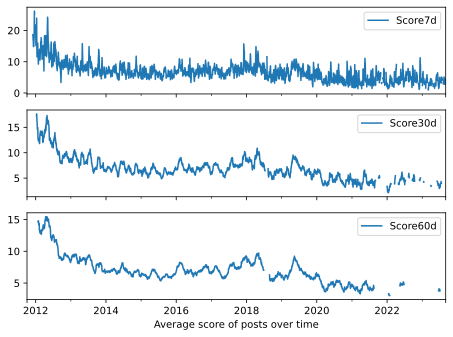

In [40]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1)

daily_df["Score7d"].plot(ax=ax1, legend=True, sharex=ax3)
daily_df["Score30d"].plot(ax=ax2, legend=True, sharex=ax3)
daily_df["Score60d"].plot(ax=ax3, legend=True)

ax3.set_xlabel("Average score of posts over time")
plt.tight_layout()

plt.show()

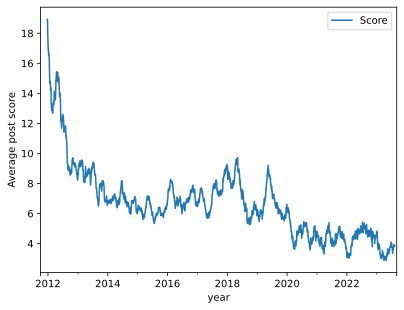

In [41]:
(daily_df["Score"]
 .rolling(60, center=True, min_periods=55)
 .mean()
 .plot(legend=True,ylabel="Average post score", xlabel="year"));

plt.show()

# Summary 

# Further explorations 

# Extensions and reflections 